# Data collection and analysis
**Group 4** \
Adam Zakaria Ababneh \
Kate Paparsenou \
Chris Umbel

In [468]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## Data Load

In [469]:
df = pd.read_csv('data/ecommerce_customer_data_cleaned.csv')
df

,Unnamed: 0,CustomerID,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,PremiumMember,HasReturnedItems,FavoriteCategory_Beauty,FavoriteCategory_Books,FavoriteCategory_Clothing,FavoriteCategory_Electronics,FavoriteCategory_Food,FavoriteCategory_Home Goods,FavoriteCategory_Sports,FavoriteCategory_Toys
0,0,CUST00001,25,Prefer not to say,High,Japan,Tokyo,4,15.886509,297.300312,...,Yes,No,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0
1,1,CUST00002,39,Prefer not to say,High,United Kingdom,London,6,27.638853,181.725056,...,No,No,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5
2,2,CUST00003,43,Prefer not to say,High,France,Paris,10,161.739425,1810.555150,...,No,Yes,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,3,CUST00004,49,Female,High,United States,Los Angeles,5,14.194263,86.219740,...,Yes,No,0.0,0.0,0.5,0.0,0.0,0.0,1.0,0.0
4,4,CUST00005,29,Female,Very High,Japan,Tokyo,7,295.493898,2112.575945,...,No,No,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,CUST09996,39,Female,High,United States,New York,4,60.986389,212.992614,...,Yes,Yes,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.0
9996,9996,CUST09997,58,Prefer not to say,Low,Australia,Sydney,6,75.208556,549.352094,...,No,Yes,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0
9997,9997,CUST09998,38,Other,Very High,United States,New York,1,37.196899,117.203509,...,No,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,9998,CUST09999,29,Other,High,Germany,Berlin,3,13.191952,-6.655247,...,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Conversion
A few fields look like integers, validate that's the case

In [470]:
pd.set_option('display.max_rows', None)
int_columns = ['TotalPurchases', 'CustomerServiceInteractions', 'Age']

In [471]:
list(map(lambda x: print(df[x].value_counts(dropna=False), end='\n\n'), int_columns))

TotalPurchases
5     1516
4     1312
3     1264
2     1097
6     1073
7      764
1      749
8      546
9      445
0      347
10     291
11     211
12     140
13      89
14      49
15      45
16      23
17      18
18       8
20       5
19       4
22       2
23       1
27       1
Name: count, dtype: int64

CustomerServiceInteractions
1     2860
2     2829
3     1652
0     1261
4      897
5      350
6       97
7       41
8        9
9        3
11       1
Name: count, dtype: int64

Age
37    628
38    588
36    518
39    447
35    399
40    339
34    304
41    254
33    243
32    241
31    239
30    238
29    236
28    232
42    227
24    218
46    216
27    209
43    205
44    205
47    202
26    201
45    197
23    180
25    179
48    165
49    163
20    163
21    161
22    156
52    155
19    147
18    137
50    133
17    133
51    129
53    120
16    117
54    117
55    108
56    101
57     76
61     66
59     59
60     56
58     54
64     46
62     45
63     36
67     32
66     31
65  

[None, None, None]

Convert the integer fields

In [472]:
df['Age'] = df['Age'].astype('Int64')
df['TotalPurchases'] = df['TotalPurchases'].astype('Int64')
df['CustomerServiceInteractions'] = df['CustomerServiceInteractions'].astype('Int64')

## Column metadata

In [473]:
df.dtypes

Unnamed: 0                        int64
CustomerID                       object
Age                               Int64
Gender                           object
IncomeLevel                      object
Country                          object
City                             object
TotalPurchases                    Int64
AverageOrderValue               float64
CustomerLifetimeValue           float64
EmailEngagementRate             float64
SocialMediaEngagementRate       float64
MobileAppUsage                   object
CustomerServiceInteractions       Int64
AverageSatisfactionScore        float64
EmailConversionRate             float64
SocialMediaConversionRate       float64
SearchEngineConversionRate      float64
RepeatCustomer                   object
PremiumMember                    object
HasReturnedItems                 object
FavoriteCategory_Beauty         float64
FavoriteCategory_Books          float64
FavoriteCategory_Clothing       float64
FavoriteCategory_Electronics    float64


In [474]:
categorical_columns = df.select_dtypes(include = 'object').columns
quantitative_columns = df.select_dtypes(include = ['float64', 'Int64']).columns

### Categorical columns

In [475]:
list(categorical_columns)

['CustomerID',
 'Gender',
 'IncomeLevel',
 'Country',
 'City',
 'MobileAppUsage',
 'RepeatCustomer',
 'PremiumMember',
 'HasReturnedItems']

### Quantitative columns

In [476]:
list(quantitative_columns)

['Unnamed: 0',
 'Age',
 'TotalPurchases',
 'AverageOrderValue',
 'CustomerLifetimeValue',
 'EmailEngagementRate',
 'SocialMediaEngagementRate',
 'CustomerServiceInteractions',
 'AverageSatisfactionScore',
 'EmailConversionRate',
 'SocialMediaConversionRate',
 'SearchEngineConversionRate',
 'FavoriteCategory_Beauty',
 'FavoriteCategory_Books',
 'FavoriteCategory_Clothing',
 'FavoriteCategory_Electronics',
 'FavoriteCategory_Food',
 'FavoriteCategory_Home Goods',
 'FavoriteCategory_Sports',
 'FavoriteCategory_Toys']

## Distribution for categorical fields

In [477]:
pd.set_option('display.max_rows', 20)
list(map(lambda x: print(df.reset_index()[x].value_counts(dropna = False), end='\n\n'), categorical_columns))

CustomerID
CUST00391    2
CUST00325    2
CUST00337    2
CUST00336    2
CUST00335    2
            ..
CUST03671    1
CUST03670    1
CUST03669    1
CUST03668    1
CUST10000    1
Name: count, Length: 9531, dtype: int64

Gender
Prefer not to say    4419
Other                1901
Female               1847
Male                 1833
Name: count, dtype: int64

IncomeLevel
Very High    2612
Medium       2589
Low          2425
High         2374
Name: count, dtype: int64

Country
United States     2392
Other             1370
Germany           1277
Japan             1274
Australia         1206
France            1089
United Kingdom    1061
Canada             331
Name: count, dtype: int64

City
Other          1370
Berlin         1277
Tokyo          1274
Paris          1220
London         1216
New York       1216
Los Angeles    1176
Sydney         1144
Canberra         62
Ottawa           45
Name: count, dtype: int64

MobileAppUsage
Never     2538
Medium    2525
Low       2479
High      2458
Name: co

[None, None, None, None, None, None, None, None, None]

## Basic statistics of quantitative fields

In [478]:
df.describe()

,Unnamed: 0,Age,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,EmailEngagementRate,SocialMediaEngagementRate,CustomerServiceInteractions,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate,FavoriteCategory_Beauty,FavoriteCategory_Books,FavoriteCategory_Clothing,FavoriteCategory_Electronics,FavoriteCategory_Food,FavoriteCategory_Home Goods,FavoriteCategory_Sports,FavoriteCategory_Toys
count,10000.00000,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,4999.50000,37.6096,5.0239,84.873838,411.698059,0.282853,0.286874,1.9791,6.954347,0.198252,0.198951,0.199737,0.158800,0.148000,0.151900,0.154600,0.150950,0.15195,0.154200,0.149500
std,2886.89568,11.64364,3.146191,88.993262,480.510485,0.154260,0.155733,1.393577,1.847582,0.117131,0.116499,0.117974,0.331502,0.321024,0.324094,0.325975,0.324191,0.32295,0.326624,0.322739
min,0.00000,16.0,0.0,1.235282,-112.793319,0.002205,0.002378,0.0,0.000000,0.000885,0.001554,0.002951,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2499.75000,30.0,3.0,27.991916,109.063119,0.165711,0.167552,1.0,5.759892,0.109850,0.110171,0.109880,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,4999.50000,37.0,5.0,54.591456,264.389893,0.267504,0.273863,2.0,6.991742,0.183158,0.184369,0.184383,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,7499.25000,44.0,7.0,105.544945,535.688015,0.376769,0.382462,3.0,8.276072,0.262120,0.265909,0.267084,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,9999.00000,91.0,27.0,574.596722,3124.391760,0.890822,0.847513,11.0,10.000000,0.783003,0.824266,0.784076,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Number of NULL columns for quantitative fields

In [479]:
df[quantitative_columns].isna().sum()

Unnamed: 0                      0
Age                             0
TotalPurchases                  0
AverageOrderValue               0
CustomerLifetimeValue           0
EmailEngagementRate             0
SocialMediaEngagementRate       0
CustomerServiceInteractions     0
AverageSatisfactionScore        0
EmailConversionRate             0
SocialMediaConversionRate       0
SearchEngineConversionRate      0
FavoriteCategory_Beauty         0
FavoriteCategory_Books          0
FavoriteCategory_Clothing       0
FavoriteCategory_Electronics    0
FavoriteCategory_Food           0
FavoriteCategory_Home Goods     0
FavoriteCategory_Sports         0
FavoriteCategory_Toys           0
dtype: int64

## Bar charts to understand distribution

In [548]:
def draw_barchart(df, column_name):
    print(column_name)
    category_counts = df.value_counts(column_name, dropna = False)
    plt.bar(category_counts.index.astype(str), category_counts.values)
    plt.xticks(rotation = 90)
    plt.grid(axis = 'y')
    plt.show()

Gender


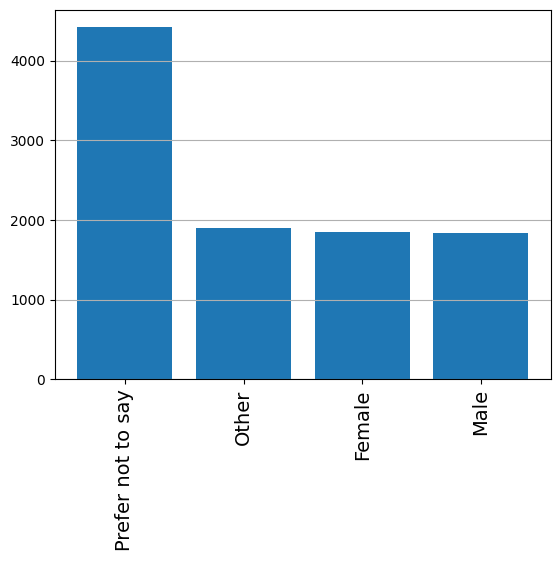

IncomeLevel


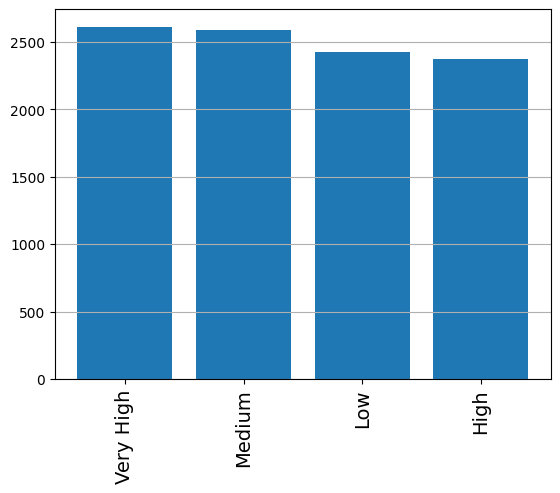

Country


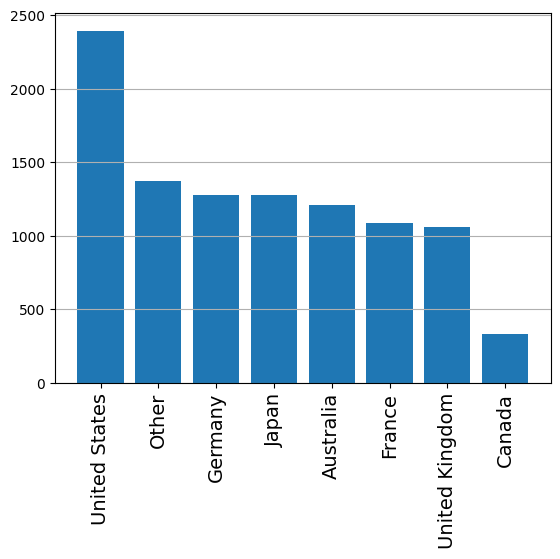

City


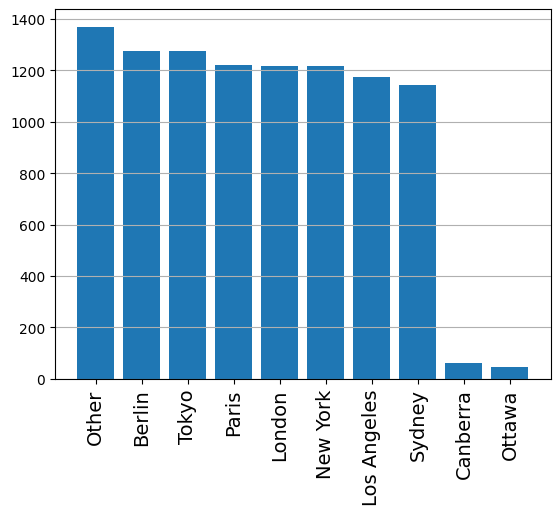

MobileAppUsage


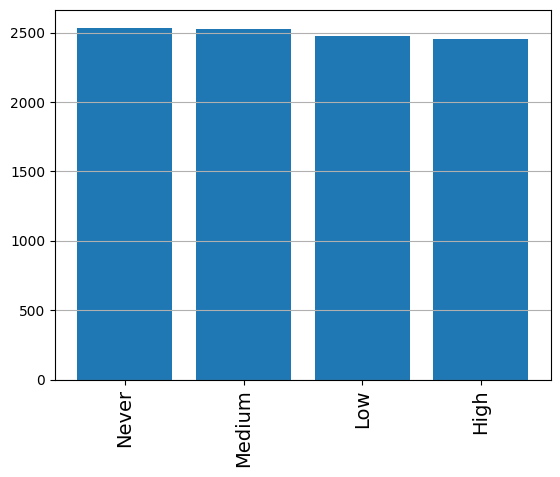

RepeatCustomer


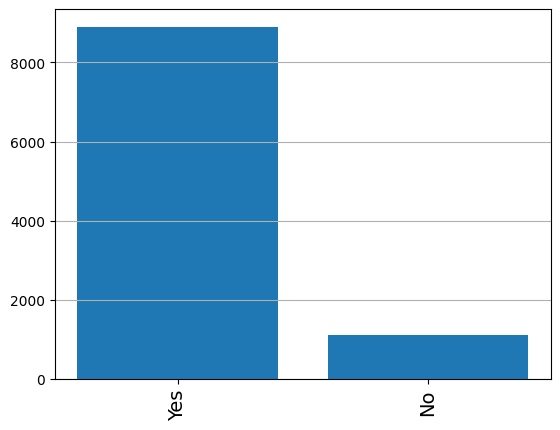

PremiumMember


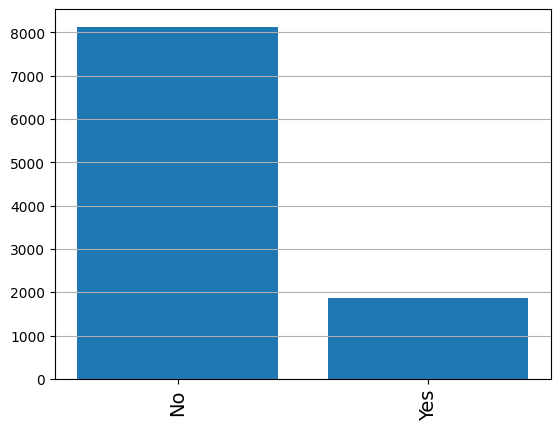

HasReturnedItems


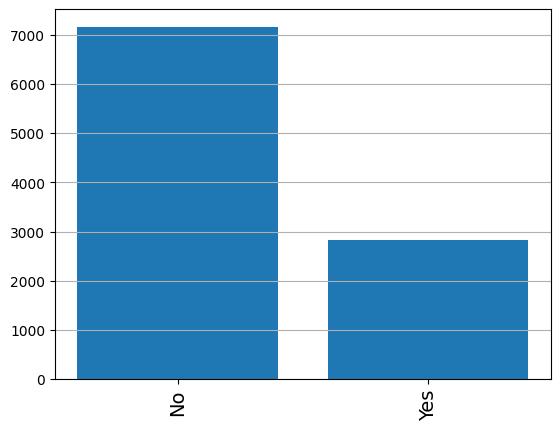

[None, None, None, None, None, None, None, None]

In [547]:
list(map(lambda x: draw_barchart(df, x), [x for x in list(categorical_columns) if x not in ['CustomerID', 'RegistrationDate']]))

## Histograms to understand distribution

In [482]:
def draw_hist(df, column_name):
    print(column_name)
    plt.hist(df[column_name], bins = 100)
    plt.xticks(rotation = 90)
    plt.grid(axis = 'y')
    plt.show()

Unnamed: 0


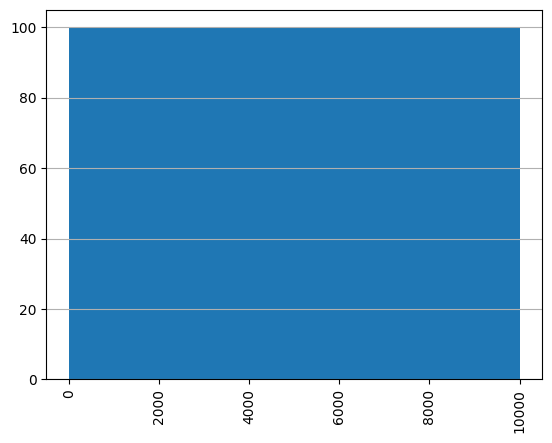

Age


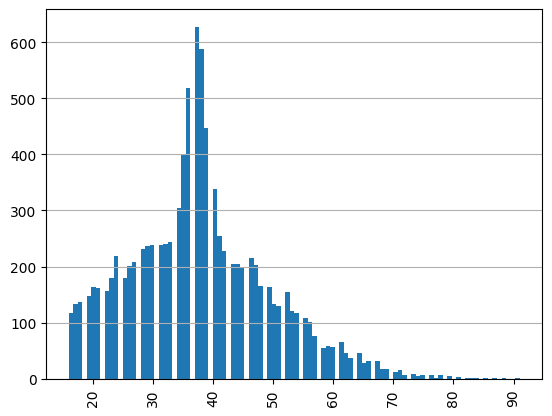

TotalPurchases


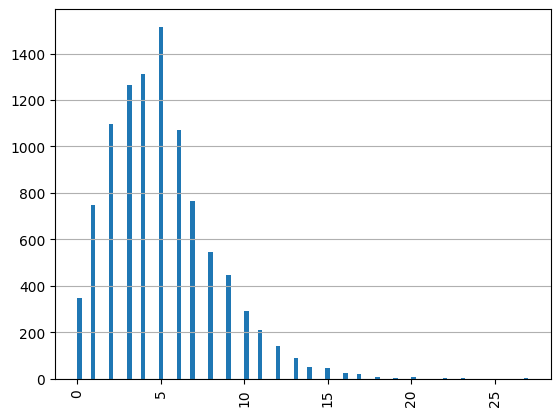

AverageOrderValue


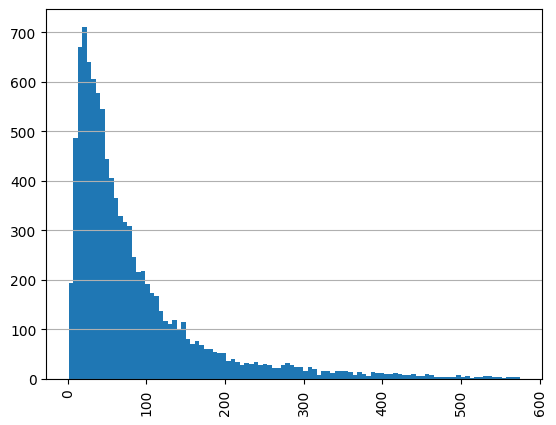

CustomerLifetimeValue


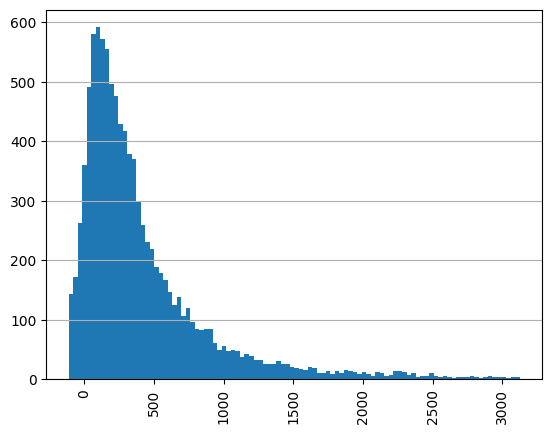

EmailEngagementRate


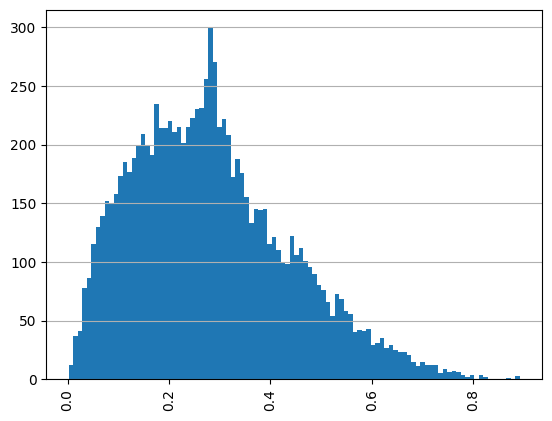

SocialMediaEngagementRate


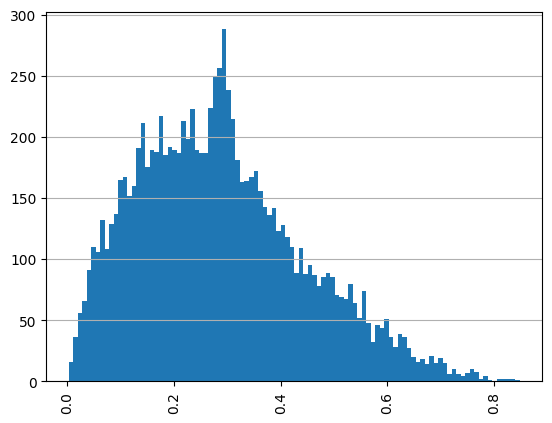

CustomerServiceInteractions


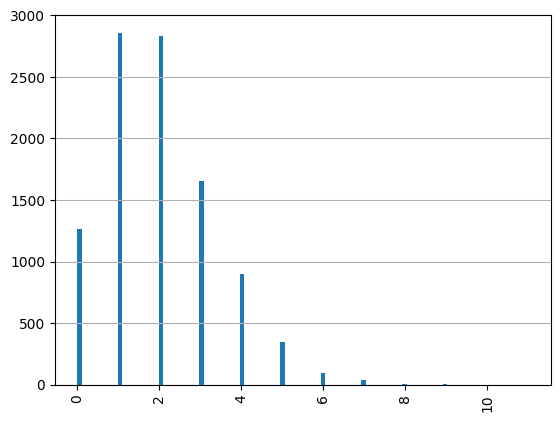

AverageSatisfactionScore


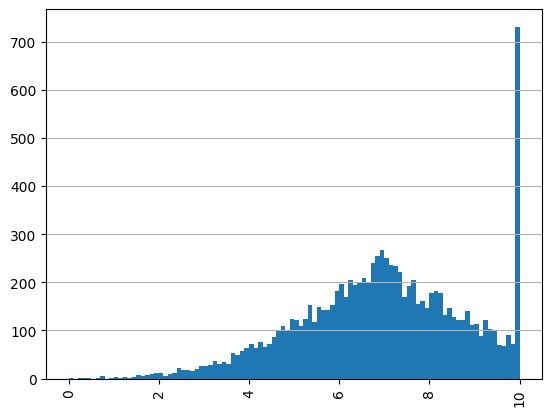

EmailConversionRate


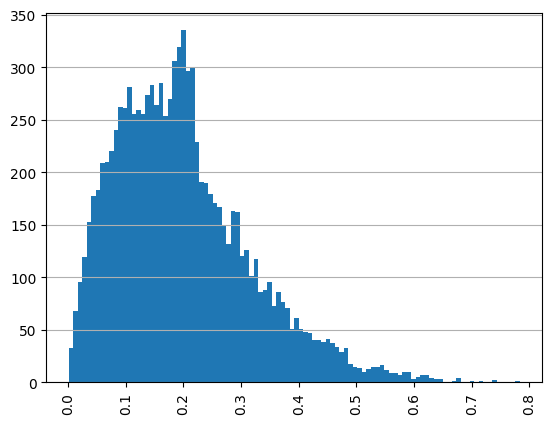

SocialMediaConversionRate


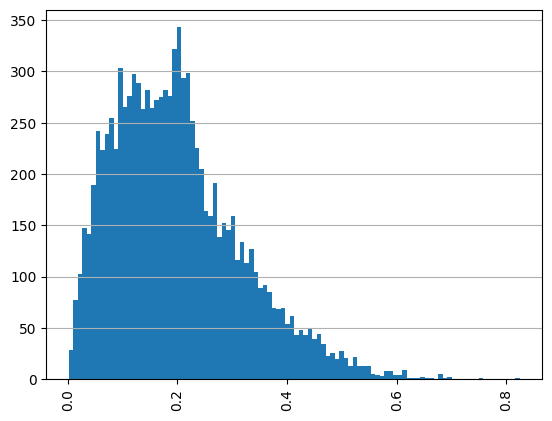

SearchEngineConversionRate


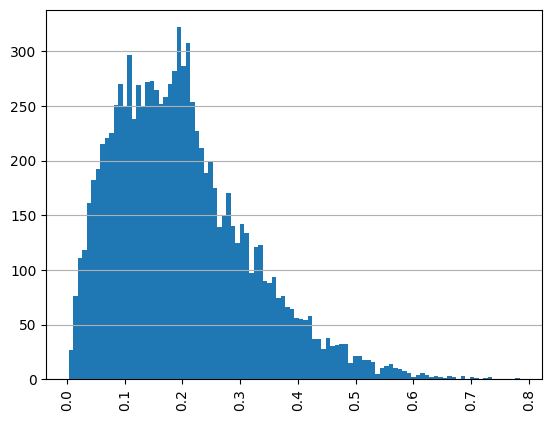

FavoriteCategory_Beauty


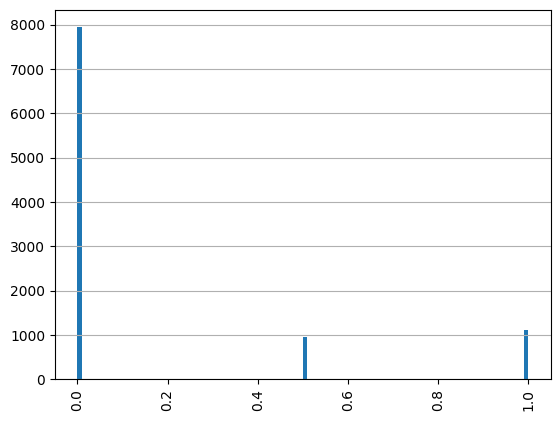

FavoriteCategory_Books


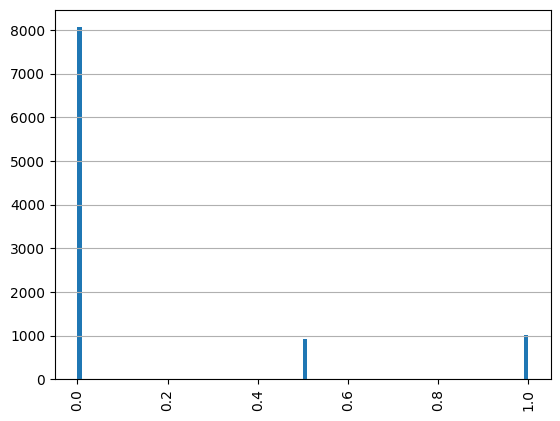

FavoriteCategory_Clothing


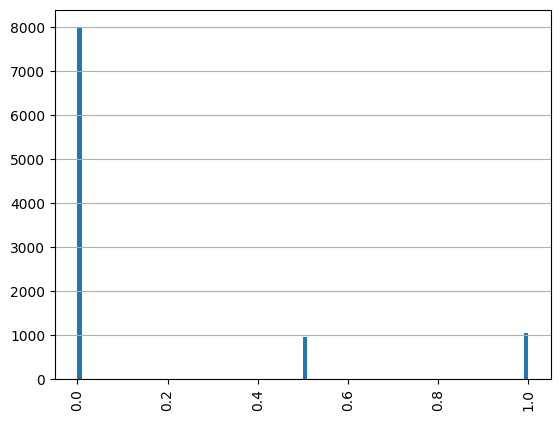

FavoriteCategory_Electronics


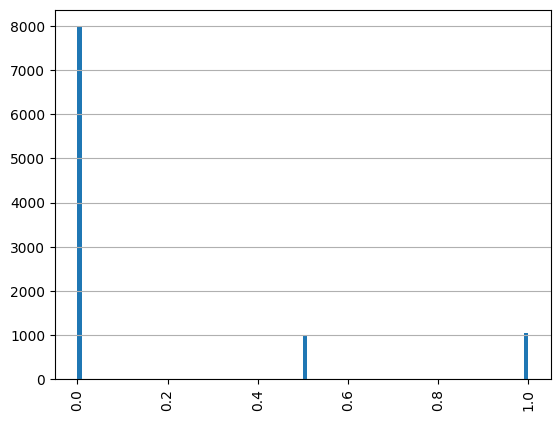

FavoriteCategory_Food


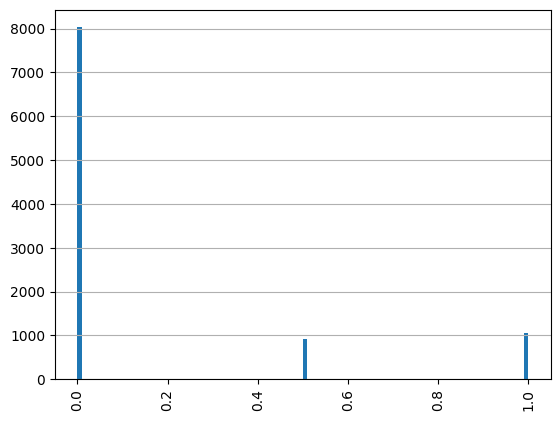

FavoriteCategory_Home Goods


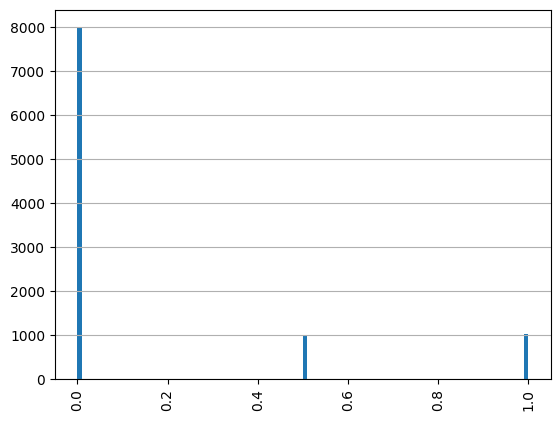

FavoriteCategory_Sports


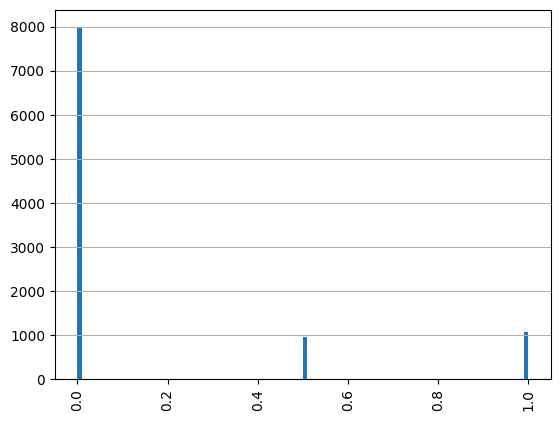

FavoriteCategory_Toys


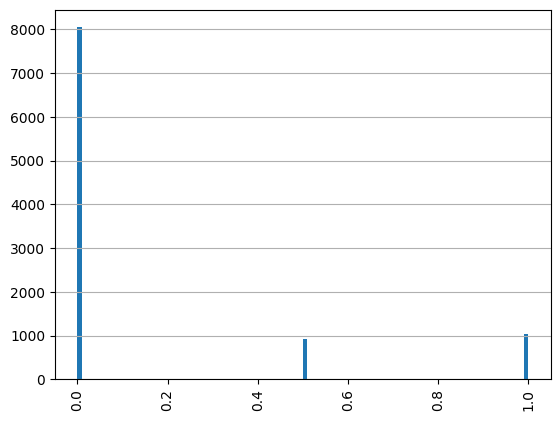

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [483]:
list(map(lambda x: draw_hist(df, x), quantitative_columns))

## Favorites-specific

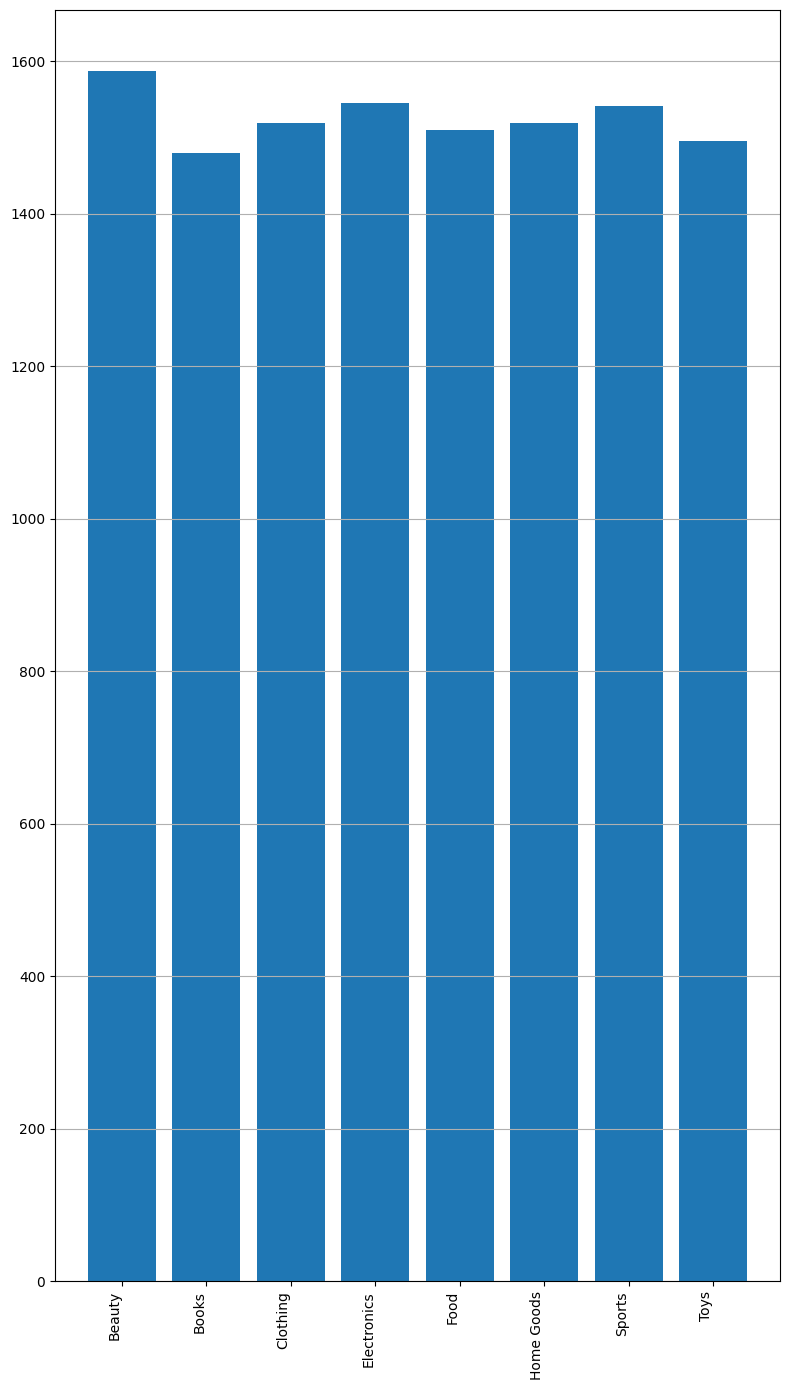

In [543]:
favorite_cols = [col for col in df.columns if col.startswith("FavoriteCategory_")]
col_names = [col.replace('FavoriteCategory_', '') for col in df.columns if col.startswith("FavoriteCategory_")]

sums = df[favorite_cols].sum()

plt.figure(figsize=(8, 14))
plt.bar(sums.index, sums.values)
plt.xticks(range(len(col_names)), col_names, rotation = 90, ha = 'right')
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

## Boxplots to understand outliers

In [484]:
def draw_boxplot(df, column_name):
    print(column_name)
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    median = df[column_name].median()
    
    fig, ax = plt.subplots(figsize=(5, 4))
    df[column_name].plot.box(
        ax = ax,
        medianprops = {'color': 'firebrick', 'linewidth': 2}
    )
    ymin, ymax = ax.get_ylim()

    ax.tick_params(axis='y', labelsize=8)
    plt.grid(axis = 'y')

    if ymax <= 1.0:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{x:7.2f}"))
    else:
        ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):9d}"))

    plt.show()

Unnamed: 0


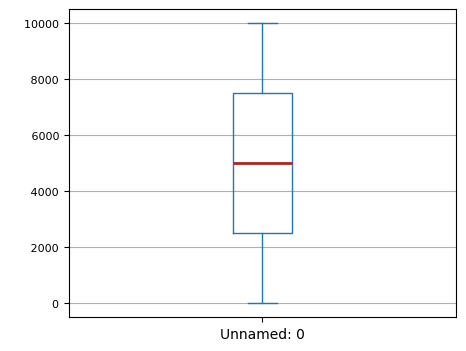

Age


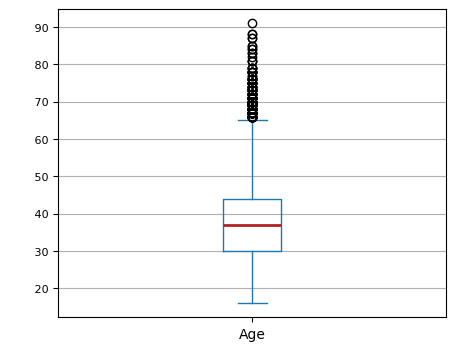

TotalPurchases


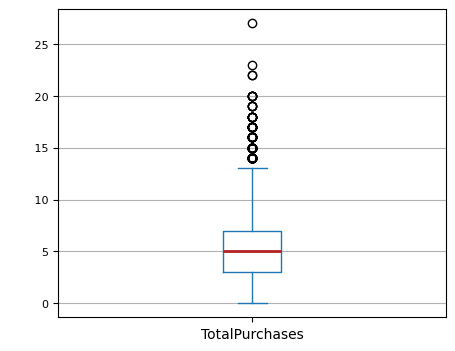

AverageOrderValue


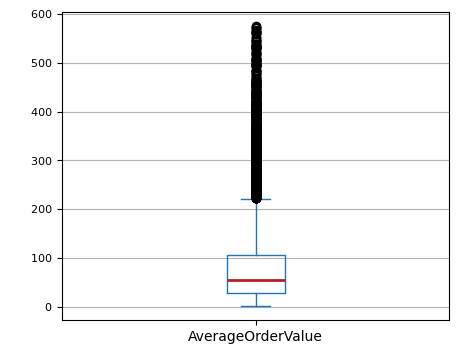

CustomerLifetimeValue


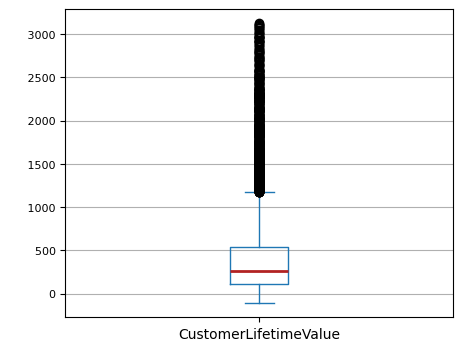

EmailEngagementRate


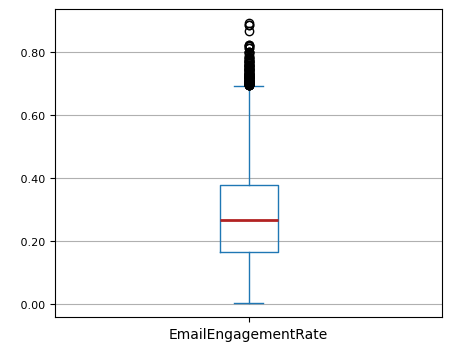

SocialMediaEngagementRate


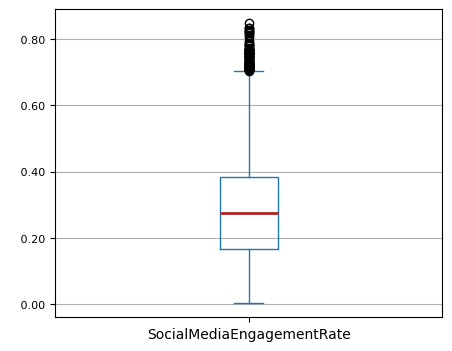

CustomerServiceInteractions


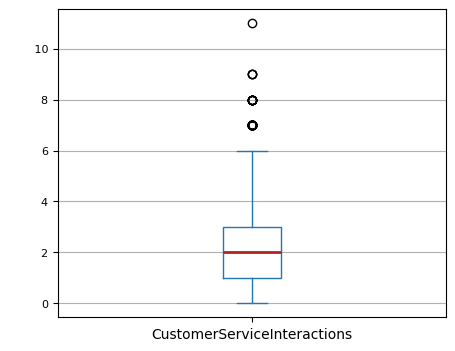

AverageSatisfactionScore


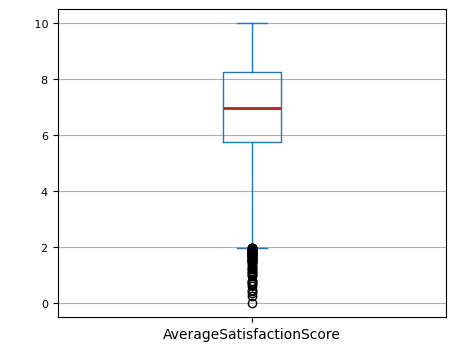

EmailConversionRate


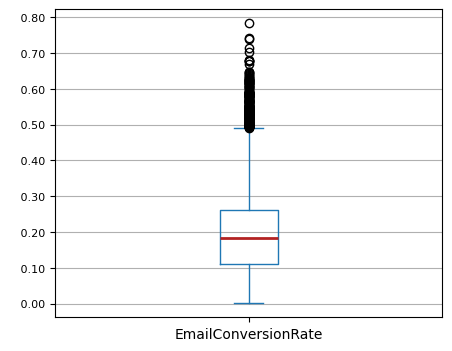

SocialMediaConversionRate


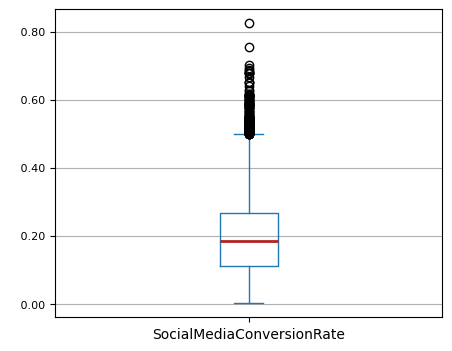

SearchEngineConversionRate


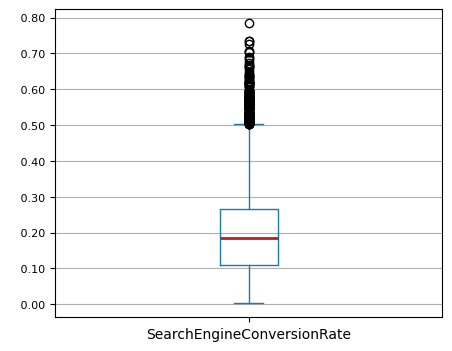

FavoriteCategory_Beauty


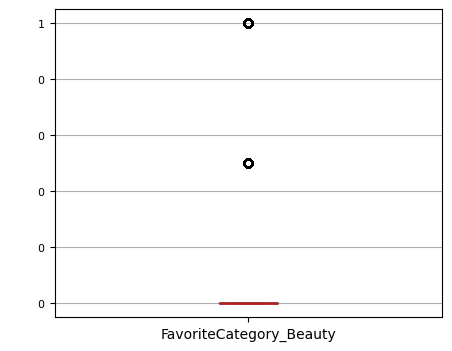

FavoriteCategory_Books


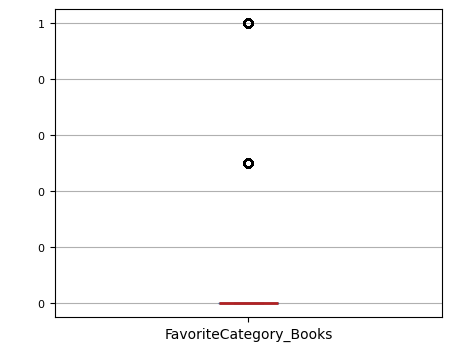

FavoriteCategory_Clothing


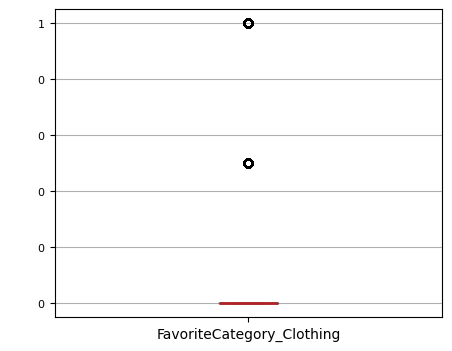

FavoriteCategory_Electronics


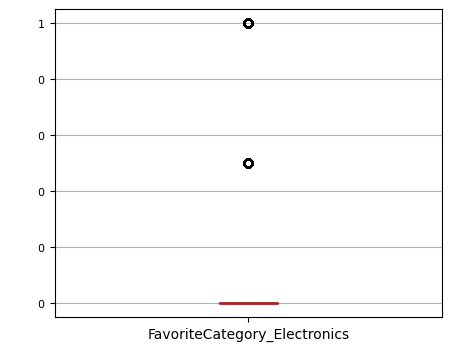

FavoriteCategory_Food


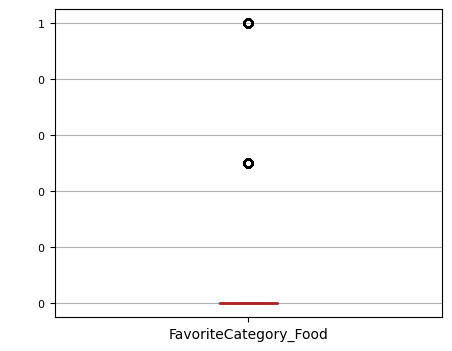

FavoriteCategory_Home Goods


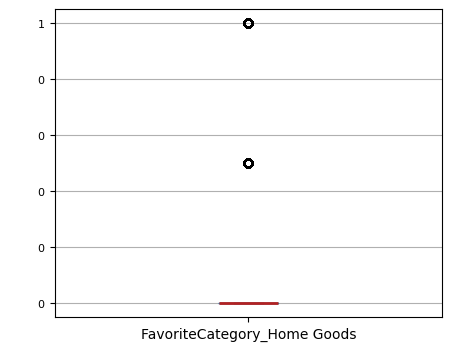

FavoriteCategory_Sports


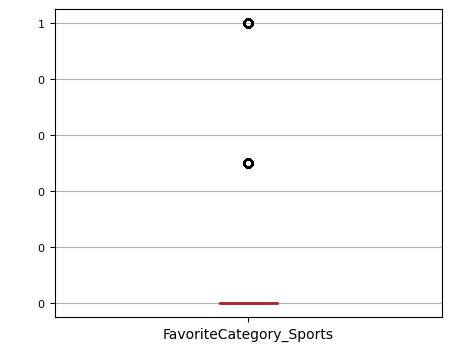

FavoriteCategory_Toys


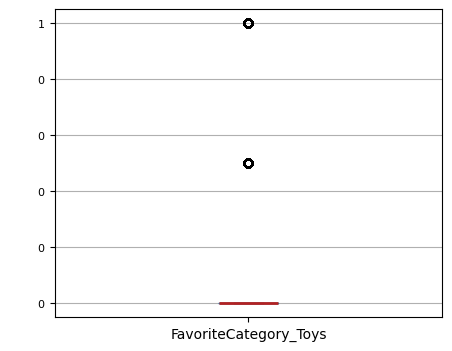

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [485]:
list(map(lambda x: draw_boxplot(df, x), quantitative_columns))

# Descriptions of quantitative columns

In [486]:
list(map(lambda x: print(df.reset_index()[x].describe(), end='\n\n'), quantitative_columns))

count    10000.00000
mean      4999.50000
std       2886.89568
min          0.00000
25%       2499.75000
50%       4999.50000
75%       7499.25000
max       9999.00000
Name: Unnamed: 0, dtype: float64

count     10000.0
mean      37.6096
std      11.64364
min          16.0
25%          30.0
50%          37.0
75%          44.0
max          91.0
Name: Age, dtype: Float64

count     10000.0
mean       5.0239
std      3.146191
min           0.0
25%           3.0
50%           5.0
75%           7.0
max          27.0
Name: TotalPurchases, dtype: Float64

count    10000.000000
mean        84.873838
std         88.993262
min          1.235282
25%         27.991916
50%         54.591456
75%        105.544945
max        574.596722
Name: AverageOrderValue, dtype: float64

count    10000.000000
mean       411.698059
std        480.510485
min       -112.793319
25%        109.063119
50%        264.389893
75%        535.688015
max       3124.391760
Name: CustomerLifetimeValue, dtype: float64

count  

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Problem analysis

## CustomerID
1. 492 NaNs

Resolutions
1. Replace with any unique value (actual value doesn't matter)


In [487]:
df['CustomerID'].value_counts(dropna = False).sort_values(ascending = False)

CustomerID
CUST00391    2
CUST00016    2
CUST00004    2
CUST00005    2
CUST00007    2
            ..
CUST09986    1
CUST09992    1
CUST09967    1
CUST09965    1
CUST10000    1
Name: count, Length: 9531, dtype: int64

## Gender
1. 2612 NaN fields
1. 3 instances of "M" rather than "Male", 1 instance of "F" rather than "Female"

Resolutions
1. Replace with `Prefer not to say`
2. Replace "M" with "Male", "F" with "Female"

In [488]:
df['Gender'].value_counts(dropna = False)

Gender
Prefer not to say    4419
Other                1901
Female               1847
Male                 1833
Name: count, dtype: int64

## IncomeLevel
1. 2503 NaN Fields
1. 1 instance of "L" rather than "Low", 1 instance of "H" rather than "High"

Resolutions
1. ??? Use a regression?
2. Replace "L" with "Low", "H" with "High"

In [489]:
df['IncomeLevel'].value_counts(dropna = False)

IncomeLevel
Very High    2612
Medium       2589
Low          2425
High         2374
Name: count, dtype: int64

## Location
1. 8186 (82%) don't match to real-world combinations according to https://simplemaps.com/data/world-cities
2. 948 are missing BOTH City and Country
3. Other in either City or Country

Resolutions
1. Assumption: City is right -- backfill country from world-cities dataset
2. Assumption: City is right -- backfill country from world-cities dataset
3. Backfill other with other location field from world-cities dataset. If both are Other -- Leave



In [490]:
df_locations = pd.read_csv('./data/worldcities.csv')
df_locations

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6870,139.7495,Japan,JP,JPN,Tōkyō,primary,37785000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
48054,Al Jabīn,Al Jabin,14.7040,43.5990,Yemen,YE,YEM,Raymah,admin,NaN,1887910100
48055,Nelspruit,Nelspruit,-25.4745,30.9703,South Africa,ZA,ZAF,Mpumalanga,admin,NaN,1710114438
48056,Gqeberha,Gqeberha,-33.9681,25.5981,South Africa,ZA,ZAF,Eastern Cape,NaN,NaN,1710000082
48057,Lupane,Lupane,-18.9315,27.8070,Zimbabwe,ZW,ZWE,Matabeleland North,admin,NaN,1716206606


In [491]:
df[(df['Country'] == 'Australia') & (df['City'] == 'Los Angeles')]

,Unnamed: 0,CustomerID,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,PremiumMember,HasReturnedItems,FavoriteCategory_Beauty,FavoriteCategory_Books,FavoriteCategory_Clothing,FavoriteCategory_Electronics,FavoriteCategory_Food,FavoriteCategory_Home Goods,FavoriteCategory_Sports,FavoriteCategory_Toys


In [492]:
df_with_location = df[~df['City'].isna() & ~df['Country'].isna()]
df_with_location_merged = pd.merge(df_with_location, df_locations, left_on = ['Country', 'City'], right_on = ['country', 'city'], how = 'outer')
df_location_problems = df_with_location_merged[df_with_location_merged['admin_name'].isna() & ~df_with_location_merged['Country'].isna()]

df_location_problems.to_csv('./data/location_problems.csv')
df_location_problems.shape[0], (df_location_problems.shape[0] / df.shape[0]) 
df_location_problems

,Unnamed: 0,CustomerID,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
36629,22.0,CUST00023,38,Other,Medium,Other,Other,5,15.381156,285.354859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36630,35.0,CUST00036,19,Prefer not to say,High,Other,Other,0,50.910274,137.647284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36631,56.0,CUST00057,35,Prefer not to say,Very High,Other,Other,8,198.413064,1644.819541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36632,57.0,CUST00058,37,Other,High,Other,Other,5,54.578202,434.178756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36633,63.0,CUST00064,35,Prefer not to say,Low,Other,Other,9,114.051470,1098.827963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37994,9974.0,CUST09975,34,Male,Very High,Other,Other,6,230.497787,1385.475115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37995,9982.0,CUST09983,43,Prefer not to say,Low,Other,Other,7,24.901817,45.774615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37996,9988.0,CUST09989,18,Prefer not to say,Low,Other,Other,11,66.976258,882.711613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37997,9990.0,CUST09991,26,Other,Very High,Other,Other,3,67.130423,303.134959,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Country
* 493 NaN

In [493]:
df['Country'].value_counts(dropna = False)

Country
United States     2392
Other             1370
Germany           1277
Japan             1274
Australia         1206
France            1089
United Kingdom    1061
Canada             331
Name: count, dtype: int64

### City
* 483 NaN

In [494]:
df['City'].value_counts(dropna = False)

City
Other          1370
Berlin         1277
Tokyo          1274
Paris          1220
London         1216
New York       1216
Los Angeles    1176
Sydney         1144
Canberra         62
Ottawa           45
Name: count, dtype: int64

### Both

In [495]:
missing_city_and_country = df.shape[0] - df_with_location.shape[0]
missing_city_and_country, missing_city_and_country / df.shape[0]

(0, 0.0)

## MobileAppUsage
* 2457 NaNs

Resolution
1. Impute with simple classifier (decision tree or logistic regression)?

In [496]:
df['MobileAppUsage'].value_counts(dropna = False)

MobileAppUsage
Never     2538
Medium    2525
Low       2479
High      2458
Name: count, dtype: int64

## RepeatCustomer
1. 475 NaNs

Resolution
1. Impute with simple classifier (decision tree or logistic regression)?

In [497]:
df['RepeatCustomer'].value_counts(dropna = False)

RepeatCustomer
Yes    8900
No     1100
Name: count, dtype: int64

## PremiumMember
1. 494 NaNs

Resolutions
1. Replace with mode ("No") or impute with simple classifier (decision tree or logistic regression)?

In [498]:
df['PremiumMember'].value_counts(dropna = False)

PremiumMember
No     8126
Yes    1874
Name: count, dtype: int64

## HasReturnedItems
1. 529 NaNs

Resolutions
1. Replace with mode ("No") or impute with simple classifier (decision tree or logistic regression)?

In [499]:
df['HasReturnedItems'].value_counts(dropna = False)

HasReturnedItems
No     7166
Yes    2834
Name: count, dtype: int64

## Age
1. Negative ages
2. 515 NaNs
3. There are non-negative, but strangley small age values (i.e. 0, 1, 2) that seem unlikely (390 values between 0 and 9 inclusive)

Steps:
for 1-3:
1. Age = abs(Age)
2. If Age < 16, then make it NaN
3. Use PCA to impute 

In [500]:
df['Age'].describe()

count     10000.0
mean      37.6096
std      11.64364
min          16.0
25%          30.0
50%          37.0
75%          44.0
max          91.0
Name: Age, dtype: Float64

In [501]:
df[df['Age'].isna()].shape[0]

0

In [502]:
df['Age'].sort_values()

6513    16
7645    16
4478    16
3021    16
8255    16
        ..
7561    87
8264    87
9421    88
1625    88
8133    91
Name: Age, Length: 10000, dtype: Int64

In [503]:
df[~df['Age'].isna()]

,Unnamed: 0,CustomerID,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,PremiumMember,HasReturnedItems,FavoriteCategory_Beauty,FavoriteCategory_Books,FavoriteCategory_Clothing,FavoriteCategory_Electronics,FavoriteCategory_Food,FavoriteCategory_Home Goods,FavoriteCategory_Sports,FavoriteCategory_Toys
0,0,CUST00001,25,Prefer not to say,High,Japan,Tokyo,4,15.886509,297.300312,...,Yes,No,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0
1,1,CUST00002,39,Prefer not to say,High,United Kingdom,London,6,27.638853,181.725056,...,No,No,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.5
2,2,CUST00003,43,Prefer not to say,High,France,Paris,10,161.739425,1810.555150,...,No,Yes,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
3,3,CUST00004,49,Female,High,United States,Los Angeles,5,14.194263,86.219740,...,Yes,No,0.0,0.0,0.5,0.0,0.0,0.0,1.0,0.0
4,4,CUST00005,29,Female,Very High,Japan,Tokyo,7,295.493898,2112.575945,...,No,No,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,CUST09996,39,Female,High,United States,New York,4,60.986389,212.992614,...,Yes,Yes,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.0
9996,9996,CUST09997,58,Prefer not to say,Low,Australia,Sydney,6,75.208556,549.352094,...,No,Yes,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0
9997,9997,CUST09998,38,Other,Very High,United States,New York,1,37.196899,117.203509,...,No,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9998,9998,CUST09999,29,Other,High,Germany,Berlin,3,13.191952,-6.655247,...,No,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [504]:
df[(df['Age'] >= 0) & (df['Age'] < 10)].sort_values(by = 'Age')

,Unnamed: 0,CustomerID,Age,Gender,IncomeLevel,Country,City,TotalPurchases,AverageOrderValue,CustomerLifetimeValue,...,PremiumMember,HasReturnedItems,FavoriteCategory_Beauty,FavoriteCategory_Books,FavoriteCategory_Clothing,FavoriteCategory_Electronics,FavoriteCategory_Food,FavoriteCategory_Home Goods,FavoriteCategory_Sports,FavoriteCategory_Toys


## TotalPurchases
1. 530 NaNs

Resolutions
1. Use PCA or regression to impute.


In [505]:
df['TotalPurchases'].describe()

count     10000.0
mean       5.0239
std      3.146191
min           0.0
25%           3.0
50%           5.0
75%           7.0
max          27.0
Name: TotalPurchases, dtype: Float64

In [506]:
df[df['TotalPurchases'].isna()].shape[0]

0

## AverageOrderValue
1. 519 NaNs
2. Extreme right skew

Resolutions
1. Impute with PCA or regression
2. Eliminate outliers by imputing everything over a percentile i.e. 95 w/ RCA or regression

In [507]:
df['AverageOrderValue'].describe()

count    10000.000000
mean        84.873838
std         88.993262
min          1.235282
25%         27.991916
50%         54.591456
75%        105.544945
max        574.596722
Name: AverageOrderValue, dtype: float64

In [508]:
df[df['AverageOrderValue'].isna()].shape[0]

0

In [509]:
df['AverageOrderValue'].sort_values(ascending=False).head(40)

9836    574.596722
575     573.597082
545     571.969876
2267    570.697690
3117    567.051594
           ...    
238     517.272327
8942    516.115187
2137    516.094712
5137    510.243141
3447    509.984429
Name: AverageOrderValue, Length: 40, dtype: float64

AverageOrderValue


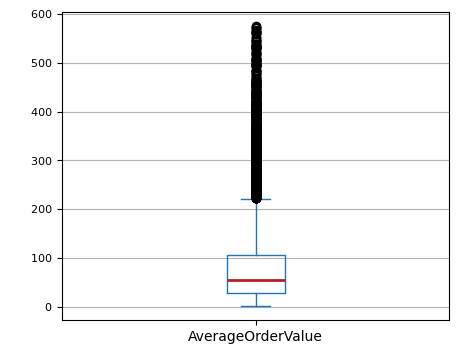

In [510]:
draw_boxplot(df, 'AverageOrderValue')

## CustomerLifetimeValue
1. 493 NaNs
2. Extreme right skew
3. 936 with negative value (9%). Not impossible (if it measures promotions, per instance), but seems unlikely.

Resolutions
1. Impute with PCA
2. Elminate outliers (probably b2b or error)

if CustomerLifetimeValue is outler (> some percentile):
$$
\mbox{CustomerLifetimeValue} = \min(\mbox{CustomerLifetimeValue}, \mbox{AverageOrderValue * TotalPurchases})
$$
3. Leave them, probably B2B or "whales"


In [511]:
df['CustomerLifetimeValue'].describe()

count    10000.000000
mean       411.698059
std        480.510485
min       -112.793319
25%        109.063119
50%        264.389893
75%        535.688015
max       3124.391760
Name: CustomerLifetimeValue, dtype: float64

In [512]:
df[df['CustomerLifetimeValue'].isna()].shape[0]

0

In [513]:
(df[df['CustomerLifetimeValue'] < 0].shape[0]), (df[df['CustomerLifetimeValue'] < 0].shape[0]) / df.shape[0]

(745, 0.0745)

CustomerLifetimeValue


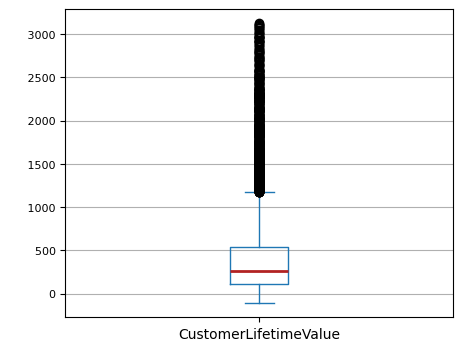

In [514]:
draw_boxplot(df, 'CustomerLifetimeValue')

## EmailEngagementRate
1. 476 NaNs

Resolution
1. Use PCA to impute

In [515]:
df['EmailEngagementRate'].describe()

count    10000.000000
mean         0.282853
std          0.154260
min          0.002205
25%          0.165711
50%          0.267504
75%          0.376769
max          0.890822
Name: EmailEngagementRate, dtype: float64

In [516]:
df[df['EmailEngagementRate'].isna()].shape[0]

0

## SocialMediaEngagementRate
1. 528 NaNs

Resolution
1. Use PCA to impute

In [517]:
df['SocialMediaEngagementRate'].describe()

count    10000.000000
mean         0.286874
std          0.155733
min          0.002378
25%          0.167552
50%          0.273863
75%          0.382462
max          0.847513
Name: SocialMediaEngagementRate, dtype: float64

In [518]:
df[df['SocialMediaEngagementRate'].isna()].shape[0]

0

## CustomerServiceInteractions
1. 518 NaNs

Resolution
1. Use PCA to impute

In [519]:
df['CustomerServiceInteractions'].describe()

count     10000.0
mean       1.9791
std      1.393577
min           0.0
25%           1.0
50%           2.0
75%           3.0
max          11.0
Name: CustomerServiceInteractions, dtype: Float64

In [520]:
df[df['CustomerServiceInteractions'].isna()].shape[0]

0

## AverageSatisfactionScore
1. 496 NaNs

Resolution
1. Use PCA to impute

In [521]:
df['AverageSatisfactionScore'].describe()

count    10000.000000
mean         6.954347
std          1.847582
min          0.000000
25%          5.759892
50%          6.991742
75%          8.276072
max         10.000000
Name: AverageSatisfactionScore, dtype: float64

In [522]:
df[df['AverageSatisfactionScore'].isna()].shape[0]

0

# EmailConversionRate
1. 523 NaNs

Resolution
1. Use PCA to impute

In [523]:
df['EmailConversionRate'].describe()

count    10000.000000
mean         0.198252
std          0.117131
min          0.000885
25%          0.109850
50%          0.183158
75%          0.262120
max          0.783003
Name: EmailConversionRate, dtype: float64

In [524]:
df[df['EmailConversionRate'].isna()].shape[0]

0

## SearchEngineConversionRate
1. 505 NaNs
  
Resolution
1. Use PCA to impute

In [525]:
df['SearchEngineConversionRate'].describe()

count    10000.000000
mean         0.199737
std          0.117974
min          0.002951
25%          0.109880
50%          0.184383
75%          0.267084
max          0.784076
Name: SearchEngineConversionRate, dtype: float64

In [526]:
df[df['SearchEngineConversionRate'].isna()].shape[0]

0